# <span style="color:orange"> Problems.<span>
*By Laura Lyons*
***

## <span style="color:orange"> Table of Contents <a id="table-of-contents"></a>
***
1. [Introduction](#introduction)
2. [Assigned Problems](#assigned-problems)  
   2.1. [Problem 01 – Extending the Lady Tasting Tea](#problem-01--extending-the-lady-tasting-tea)  
   2.2. [Problem 02 – Normal Distribution](#problem-02--normal-distribution)  
   2.3. [Problem 03 – t-Tests](#problem-03--t-tests)  
   2.4. [Problem 04 – ANOVA](#problem-04--anova)
3. [References](#references)

## <span style="color:orange"> 1. Introduction <span> <a id="introduction"></a>

This notebook was created to fulfill an assessment requirement of Applied Statistics 25-25:(8651), Higher Diploma in Science, Data Analytics, as part of the H.Dip in Science in Data Analytics.

Each week, following a series of lectures, an problem was set, to demonstrate both learning and additional reading/research on the topics discussed in the lectures.

This notebook is a collection of the solutions to the problems set, including some additional guidance and instruction on how to run each assignment/program.

***

## <span style="color:orange">2. Assigned Problems<span> <a id="assigned-problems"></a>

## <span style="color:orange">**Problem 01 - Extending the Lady Tasting Tea**<span> <a id="problem-01--extending-the-lady-tasting-tea"></a>

**1.1 Assignment Instructions:**

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

**1.2 Objective**

The objective of this problem is to simulate the *'Lady Testing Tea'* experiment and compare the probability of correctly identifyig all milk-first ups by changes in:
1. The original 8-cup setup (4 milk-first, 4 tea-first).
1. An extended 12-cup setup (4 milk-first, 8 tea-first).


**1.3 Data Analysis**

First we need to import our prerequisites

In [89]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

Initially we need to define some basic parameters, including the number of cups in total for each experiment,i.e. the original and the extended experient.

In [90]:
# Number of cups of tea in total.
original_number_cups = 8
extended_number_cups = 12

# Number of cups of tea with milk in first.
original_number_cups_milk_first = 4
extended_number_cups_milk_first = 4

# Number of cups of tea with tea in first.
original_number_cups_tea_first = 4
extended_number_cups_tea_first = 8

# Number of ways of selecting four cups from eight.
original_ways = math.comb(original_number_cups, original_number_cups_milk_first)
extended_ways = math.comb(extended_number_cups, extended_number_cups_milk_first)

# Show original number of ways (answer= 70)
original_ways

70

In [91]:
# Show extended number of ways (answer= 495)
extended_ways

495

In [92]:
# Total number of ways of selecting four cups from eight, keeping them in order.
original_ways_ordered = 8 * 7 * 6 * 5

# Show total number of ordered ways (answer= 1680)
original_ways_ordered

1680

In [93]:
# Total number of ways of selecting four cups from 12, keeping them in order.
extended_ways_ordered = 12 * 11 * 10 * 9

# Show total number of ordered ways (answer= 11880)
extended_ways_ordered

11880

In this experiement, we need to build in the functionality to deal with the fact that:
- the same cup cannot be selected twice, and
- the order of the cup combination does not matter.

In [94]:
# No of ways of shuffling four cups.
number_shuffles = 4 * 3 * 2 * 1

# Number of combinations
original_number_of_combinations = original_ways_ordered // number_shuffles
# Floor division operator (//) was used to ensure that the answer retured is an integer, and not a float
# Reference: https://docs.python.org/3/tutorial/floatingpoint.html

# Show original number of combinations (answer= 24)
original_number_of_combinations

70

In [95]:
# Number of combinations
extended_number_of_combinations = extended_ways_ordered // number_shuffles

# Show extended number of combinations (answer= 495)
extended_number_of_combinations

495

We address the ordering of the results by providing each cup with a unique label (order not relevant), and then convert this list into a set.

In [96]:
# The cup labels.
original_labels = list(range(original_number_cups))
extended_labels = list(range(extended_number_cups))

In [97]:
# Show original labels.
original_labels

[0, 1, 2, 3, 4, 5, 6, 7]

In [98]:
# Show extended labels.
extended_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

We now need to calculate the number of different ways of selecting *number_cups_milk_first* of *number_cups*, cups of tea, for both iterations of the experiment.

In [99]:
# Show the different ways of selecting *no_cups_milk_first* out of no_cups cups of tea.
original_combinations = list(itertools.combinations(original_labels, original_number_cups_milk_first))
extended_combinations = list(itertools.combinations(extended_labels, extended_number_cups_milk_first))

We can now check the number of combinations generated, for both iterations of the experiment.

In [100]:
# Number of original combinations.
len(original_combinations)

70

In [101]:
# Number of extended combinations.
len(extended_combinations) 

495

We need to select four random cups to put milk in first.For this we use, 

```ruby
    random.sample(population,k,*,counts=none)
```

Used for [random sampling](https://docs.python.org/3/library/random.html#random.sample) without replacement. 

After which, we must convert the randomly generated list into a set.

In [102]:
# Select four cups at random to put milk in first.
original_labels_milk = random.sample(original_labels, 4)
extended_labels_milk = random.sample(extended_labels, 4)

# Sort, inplace to make comparison easier.
original_labels_milk.sort()
extended_labels_milk.sort()

# Convert to sets.
original_labels_milk = set(original_labels_milk)
extended_labels_milk = set(extended_labels_milk)

# Show.
original_labels_milk


{0, 1, 2, 3}

In [103]:
# Show.
extended_labels_milk

{1, 2, 8, 9}

We now need to calculate the overlap between each element of combinations and original_labels_milk and extended_labels_milk.

In [104]:
# Calculate the overlap between each element of combs and original_labels_milk.

original_number_overlaps = []

# Loop through the original combinations.
for comb in original_combinations:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn original_labels_milk into a set.
  s2 = set(original_labels_milk)
  # Figure out where they overlap.
  original_overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # print(comb, len(original_overlap), original_overlap)
  # Append overlap to original_number_overlaps.
  original_number_overlaps.append(len(original_overlap))

  # Show the overlaps.
print(original_number_overlaps)

[4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [105]:
# Calculate the overlap between each element of combs and extended_labels_milk.

extended_number_overlaps = []

# Loop through the extended combinations.
for comb in extended_combinations:
  # Turn comb into a set.
  s3 = set(comb)
  # Turn extended_labels_milk into a set.
  s4 = set(extended_labels_milk)
  # Figure out where they overlap.
  extended_overlap = s3.intersection(s4)
  # Show the combination and the extended overlap.
  # print(comb, len(extended_overlap), extended_overlap)
  # Append overlap to extended_number_overlaps.
  extended_number_overlaps.append(len(extended_overlap))

# Show the overlaps.
print(extended_number_overlaps)

[2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 4, 3, 3, 3, 3, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 

In [106]:
# Count the number of times each original_overlap occurs.
original_counts = np.unique(original_number_overlaps, return_counts=True)

# Show.
original_counts

(array([0, 1, 2, 3, 4]), array([ 1, 16, 36, 16,  1]))

In [107]:
# Count the number of times each extended_overlap occurs.
extended_counts = np.unique(extended_number_overlaps, return_counts=True)

# Show.
extended_counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1]))

Now lets create a viualisation of the number of times that each overlap occurs for each iteratio of the experiment.

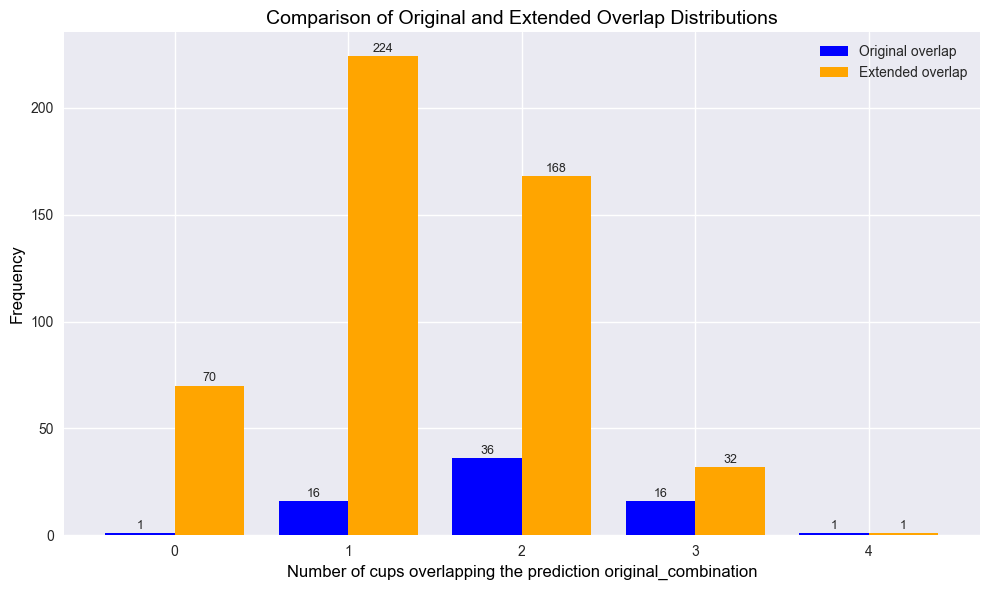

In [132]:
# Original and extended data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Bar width and positions
bar_width = 0.4
x = original_counts[0]
x_original = x - bar_width / 2
x_extended = x + bar_width / 2

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x_original, original_counts[1], width=bar_width, color='blue', label='Original overlap')
ax.bar(x_extended, extended_counts[1], width=bar_width, color='orange', label='Extended overlap')

# Labels and title
ax.set_xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
ax.set_ylabel('Frequency', fontsize=12, color='black')
ax.set_title('Comparison of Original and Extended Overlap Distributions', fontsize=14, color='black')
ax.legend()

# Value labels
for x_val, y_val in zip(x_original, original_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)
for x_val, y_val in zip(x_extended, extended_counts[1]):
    ax.text(x_val, y_val + 2, str(y_val), ha='center', fontsize=9)

plt.tight_layout()
plt.grid(True)
plt.show()


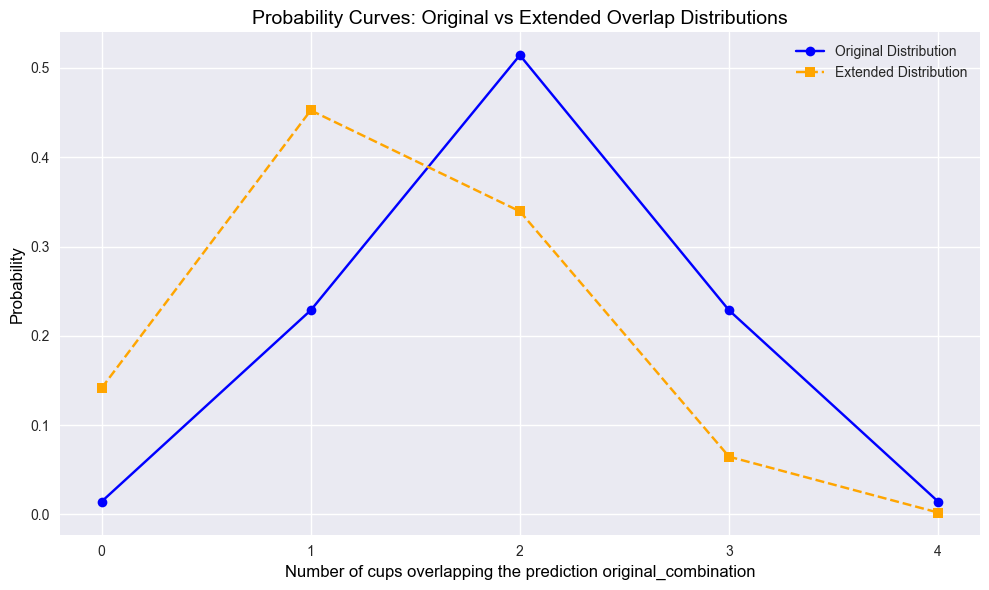

In [133]:
# Creating overlay plot of probability curves for original and extended overlap distributions
# Original and extended frequency data
original_counts = (np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1]))
extended_counts = (np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1]))

# Normalize to convert frequencies into probabilities
original_probs = original_counts[1] / np.sum(original_counts[1])
extended_probs = extended_counts[1] / np.sum(extended_counts[1])

# Create the plot
plt.style.use('seaborn-v0_8') # the -v0_8 version of the seaborn style is used for better aesthetics, as 'seaborn' alone has depreciated.
plt.figure(figsize=(10, 6))

# Plot original probability curve
plt.plot(original_counts[0], original_probs, label='Original Distribution', color='blue', linestyle='-', marker='o')

# Plot extended probability curve
plt.plot(extended_counts[0], extended_probs, label='Extended Distribution', color='orange', linestyle='--', marker='s')

# Add labels and title
plt.xlabel('Number of cups overlapping the prediction original_combination', fontsize=12, color='black')
plt.ylabel('Probability', fontsize=12, color='black')
plt.title('Probability Curves: Original vs Extended Overlap Distributions', fontsize=14, color='black')
plt.legend()
plt.grid(True)

# Force x-axis to show only whole numbers
plt.xticks(np.arange(0, 5, 1))  # from 0 to 4, step 1
plt.tight_layout()


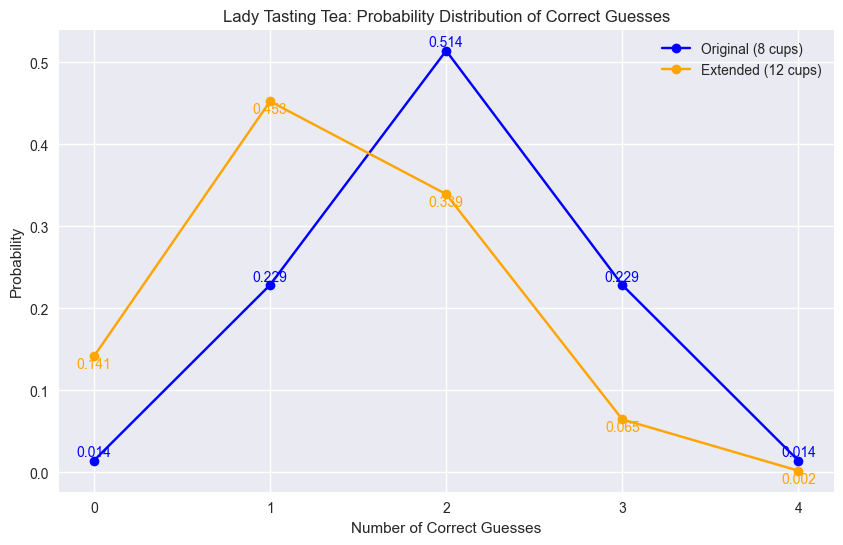

In [ ]:
# Enhancing Lady Tasting Tea probability curve with annotations (using Microsoft Co-pilot to help generate part of this graph)
# Original and extended frequency data
original_x, original_freq = np.array([0, 1, 2, 3, 4]), np.array([1, 16, 36, 16, 1])
extended_x, extended_freq = np.array([0, 1, 2, 3, 4]), np.array([70, 224, 168, 32, 1])

# Normalize to probabilities
original_prob = original_freq / original_freq.sum()
extended_prob = extended_freq / extended_freq.sum()

# Plotting
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(original_x, original_prob, marker='o', label='Original (8 cups)', color='blue')
ax.plot(extended_x, extended_prob, marker='o', label='Extended (12 cups)', color='orange')

# Annotate each point with its probability
for x, p in zip(original_x, original_prob):
    ax.text(x, p + 0.005, f"{p:.3f}", ha='center', color='blue')

for x, p in zip(extended_x, extended_prob):
    ax.text(x, p - 0.015, f"{p:.3f}", ha='center', color='orange')

# Axis formatting
ax.set_xticks(original_x)
ax.set_xlabel("Number of Correct Guesses")
ax.set_ylabel("Probability")
ax.set_title("Lady Tasting Tea: Probability Distribution of Correct Guesses")
ax.legend()
ax.grid(True)


**1.4 Discussion & Conclusion**

**The Null Hypothesis**
- The lady has no special power to tell the difference between cups of tea with milk in first and cups of tea with tea in first.

- The lady is selecting the four cups from the eight cups at random.

**Alternative Hypothesis**
- The lady can tell the difference.

From the above analysis, we can see that the estimated probability of correctly identifying the 4 milk-first cups in the 8-cup set up is *p*=0.014 = 1.4%, and in the 12-cup set is only *p*=0.002 = 0.2%.

This shows that the chance of correctly identifyig all 4 milk_first cups, by guessing, drops dramaticaly in the 12-cup setup therefore making random success highly unlikely. This would suggest that is would be reasonable to relax the *p* value threshold (from 0.05 to 0.10) because the likelihood of a false positive (Type I) error is much lower in the extended iteration of the experiment.



***

## <span style="color:orange">**Problem 02 - Normal Distribution**<span> <a id="problem-02--normal-distribution"></a>

**2.1 Assignment Instructions:**

a) Generate 100,000 samples of size 10 from the standard normal distribution.

b) For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). 

c) Plot histograms of both sets of values on the same axes with transparency.

d) Describe the differences you see. 

e) Explain how you expect these differences to change if the sample size is increased.

***

**2.2 Data Analysis**

First we need to import our prerequisites

In [129]:
# Binomial distribution.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as stats

# Statistical models.
import statsmodels as sm

**(a) <u>Generate 100,000 samples of size 10 from the standard normal distribution.</u>**

[**numpy.random.normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

    random.normal(loc=0.0, scale=1.0, size=None)

where: 

- ``loc`` is the mean (center) of the **normal distribution**, in this equation=0 (standard normal).

- ``scale`` is the **standard deviation** (spread or "width") of the normal distribution, in this equation=1 (standard normal).

- ``size`` is the shape of the output array, in this equation=(100000, 10) means 100,000 samples each of size 10.

<span style="color:red; font-weight:bold">Look into how you would set up a generator as an alternative to numpy.random.binomial.</span>

In [126]:
# Reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples = np.random.normal(loc=0, scale=1, size=(100000, 10))

# Optional: check shape and preview
print(samples.shape)       # Output: (100000, 10)
print(samples[:5])         # Preview first 5 samples

(100000, 10)
[[-1.25478525 -1.39332525 -0.39429618 -0.36625351 -1.22518414 -0.52630936
  -0.09831784  2.44271575  0.33745213 -1.23441285]
 [ 2.12323702  0.40773805 -0.85152008 -1.93610443 -1.70918303  1.03280051
  -0.53488057  0.76088636  2.3282      0.7635515 ]
 [ 0.02317587  1.13840523 -1.537005    1.46154822  0.30144333 -0.4656502
  -1.19922003 -0.62475514  0.5649769   0.49953334]
 [-0.5522843   0.60950516  2.63832726  0.58175994  0.95165116 -0.7654872
   1.86944869 -2.04928447 -0.10537444  0.03102094]
 [-0.04037812  0.86780971  1.01818547 -0.46813311 -1.88720862  0.7227226
   1.76693723  0.49560516  0.32240555  0.43889586]]


**(b) <u>For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). </u>**

[numpy.std](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

    numpy.std(samples, axis=None, ddof=0)

where:

- ``samples`` = the array that we want to compute the **standard deviation** of.

- ``axis=1``= computes the standard deviation **across each row**, treating each row as one sample.

- ``ddof=1``= Means Delta Degrees of Freedom, and divides by \( n - 1 \), giving the **sample standard deviation**.

- ``ddof=0``= divides by \( n \), giving the **population standard deviation**.


In [127]:
# Compute sample standard deviation (ddof=1)
sample_sd = np.std(samples, axis=1, ddof=1)

# Compute population standard deviation (ddof=0)
population_sd = np.std(samples, axis=1, ddof=0)

# Optional: preview
print("Sample SD (first 5):", sample_sd[:5])
print("Population SD (first 5):", population_sd[:5])

Sample SD (first 5): [1.14597263 1.46953643 0.97166812 1.33931418 0.98381405]
Population SD (first 5): [1.08716509 1.39412467 0.92180531 1.27058499 0.93332796]


**(c) <u>Plot histograms of both sets of values on the same axes with transparency.</u>**

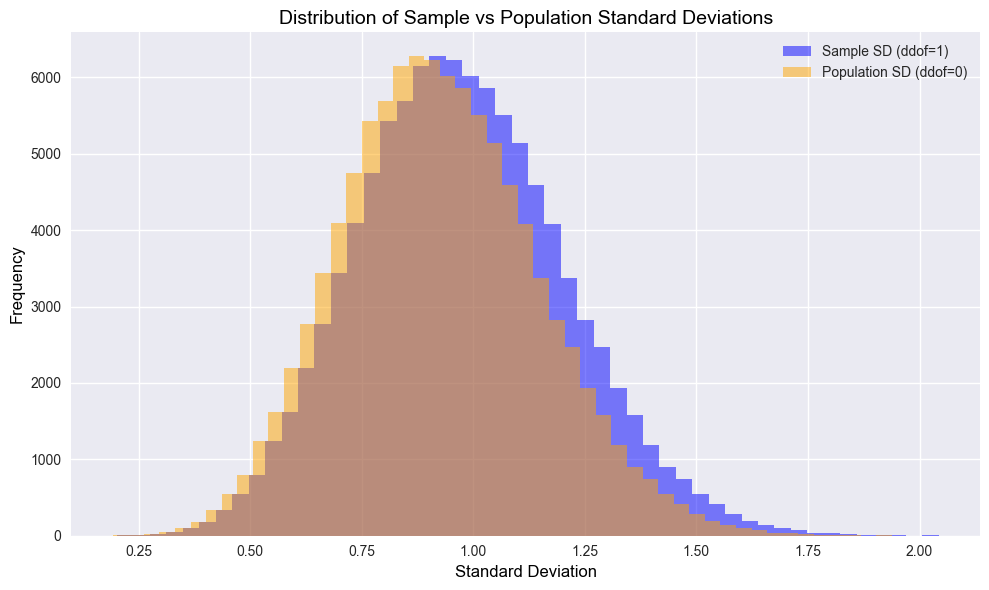

In [131]:
# Plot histograms
# Create the plot, as a histogram. 
plt.figure(figsize=(10, 6))
plt.hist(sample_sd, bins=50, alpha=0.5, label='Sample SD (ddof=1)', color='blue')
plt.hist(population_sd, bins=50, alpha=0.5, label='Population SD (ddof=0)', color='orange')

# Add title.
plt.title('Distribution of Sample vs Population Standard Deviations', fontsize=14, color='black')

# Add labels to the axes.
plt.xlabel('Standard Deviation', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')

# Add the legend.
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**(d) Describe the differences you see.**

**(e) Explain how you expect these differences to change if the sample size is increased.**

In [128]:
# Flip a single coin several times.
flips = np.random.binomial(1000, 0.5)

# Show.
flips

472

## <span style="color:orange">**Problem 03 -  t-Tests**<span> <a id="problem-03--t-tests"></a>

**3.1 Assignment Instructions:**

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.

***

## <span style="color:orange">**Problem 04 -  ANOVA**<span> <a id="problem-04--anova"></a>

**Assignment Instructions:**

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

***

### End